# Plotting for part one in project 1 (Franke function)


In [58]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Suppress ConvergenceWarning and LinAlgWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)  # This covers LinAlg warnings

import importlib
import general_functions
import plotting_functions
importlib.reload(general_functions)
importlib.reload(plotting_functions)
from general_functions import *
from plotting_functions import *

plt.style.use('ggplot')

np.random.seed(0)

## MSE and R2 for OLS, Ridge and Lasso

In [59]:
N = 25
max_degree = 25
noise_eps = 0.1
scores_ols = scores_deg(OLS, N, max_degree, noise_eps=noise_eps)

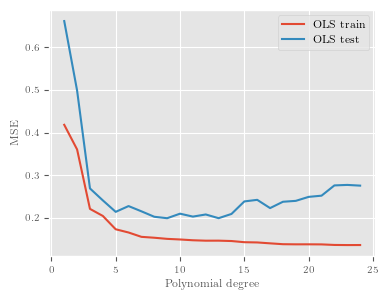

In [60]:
# ols mse
fig, ax = make_plot(2, 2)
plt.plot(range(1, max_degree), [mse[0] for mse in scores_ols[0]], label='OLS train')
plt.plot(range(1, max_degree), [mse[1] for mse in scores_ols[0]], label='OLS test')
plt.ylabel('MSE')

plt.xlabel('Polynomial degree')
plt.legend()
plt.savefig('../figures/ols_scores_mse_maxorder25.pdf', bbox_inches='tight')
plt.show()

In [61]:
N = 25
order = 5
max_degree = 6
noise_eps = 0.01
lambdas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
scores_ols = scores_deg(OLS, N, max_degree, noise_eps=noise_eps)
scores_ridge = scores_lambda(RidgeRegression, N, order, lambdas, noise_eps=noise_eps)
scores_lasso = scores_lambda(LassoRegression, N, order, lambdas, noise_eps=noise_eps)

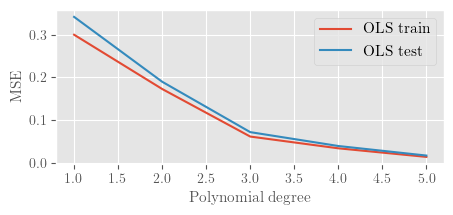

In [62]:
# ols mse
fig, ax = make_plot(2, 1)
plt.plot(range(1, max_degree), [mse[0] for mse in scores_ols[0]], label='OLS train')
plt.plot(range(1, max_degree), [mse[1] for mse in scores_ols[0]], label='OLS test')
plt.ylabel('MSE')
plt.xlabel('Polynomial degree')
plt.legend()
plt.savefig('../figures/ols_scores_mse.pdf', bbox_inches='tight')
plt.show()

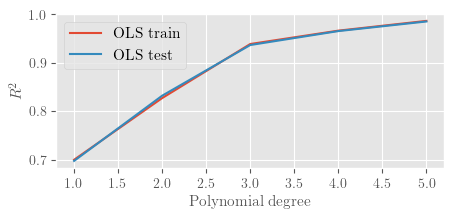

In [63]:
# ols r2
fig, ax = make_plot(2, 1)
plt.plot(range(1, max_degree), [r2[0] for r2 in scores_ols[1]], label='OLS train')
plt.plot(range(1, max_degree), [r2[1] for r2 in scores_ols[1]], label='OLS test')
plt.ylabel(r'$R^2$')
plt.xlabel('Polynomial degree')
plt.legend()
plt.savefig('../figures/ols_scores_r2.pdf', bbox_inches='tight')
plt.show()

5


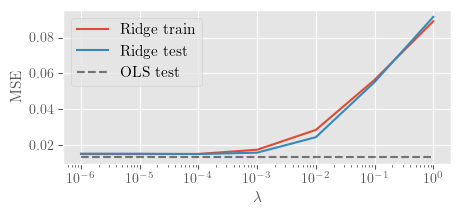

In [64]:
# ridge mse
fig, ax = make_plot(2, 1)
print(len(scores_ols[0]))
plt.semilogx(lambdas, [mse[0] for mse in scores_ridge[0]], label='Ridge train')
plt.semilogx(lambdas, [mse[1] for mse in scores_ridge[0]], label='Ridge test')
# add horisontal line for ols test mse
plt.hlines(scores_ols[0][order-1][0],lambdas[0], lambdas[-1], color='k', linestyle='--', label='OLS test', alpha=0.5)
plt.ylabel('MSE')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.savefig('../figures/ridge_scores_mse.pdf', bbox_inches='tight')
plt.show()

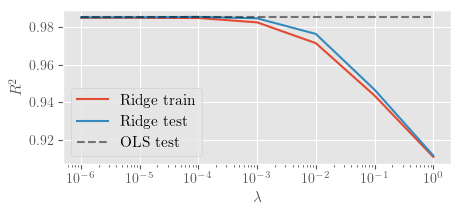

In [65]:
# ridge r2
fig, ax = make_plot(2, 1)
plt.semilogx(lambdas, [r2[0] for r2 in scores_ridge[1]], label='Ridge train')
plt.semilogx(lambdas, [r2[1] for r2 in scores_ridge[1]], label='Ridge test')
plt.hlines(scores_ols[1][order-1][1],lambdas[0], lambdas[-1], color='k', linestyle='--', label='OLS test', alpha=0.5)
plt.ylabel(r'$R^2$')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.savefig('../figures/ridge_scores_r2.pdf', bbox_inches='tight')
plt.show()

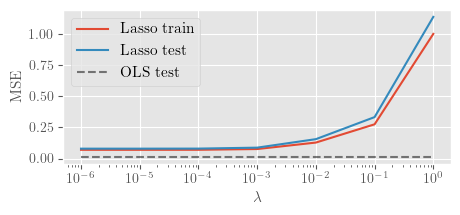

In [66]:
# lasso mse
fig, ax = make_plot(2, 1)
plt.semilogx(lambdas, [mse[0] for mse in scores_lasso[0]], label='Lasso train')
plt.semilogx(lambdas, [mse[1] for mse in scores_lasso[0]], label='Lasso test')
plt.hlines(scores_ols[0][order-1][0],lambdas[0], lambdas[-1], color='k', linestyle='--', label='OLS test', alpha=0.5)
plt.ylabel('MSE')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.savefig('../figures/lasso_scores_mse.pdf', bbox_inches='tight')
plt.show()


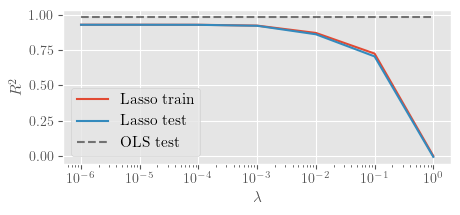

In [67]:
# lasso r2
fig, ax = make_plot(2, 1)
plt.semilogx(lambdas, [r2[0] for r2 in scores_lasso[1]], label='Lasso train')
plt.semilogx(lambdas, [r2[1] for r2 in scores_lasso[1]], label='Lasso test')
plt.hlines(scores_ols[1][order-1][1],lambdas[0], lambdas[-1], color='k', linestyle='--', label='OLS test', alpha=0.5)
plt.ylabel(r'$R^2$')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.savefig('../figures/lasso_scores_r2.pdf', bbox_inches='tight')
plt.show()


## Plotting the beta values

In [68]:
N = 25
order = 5
max_degree = 5
noise_eps = 0.01
lambdas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

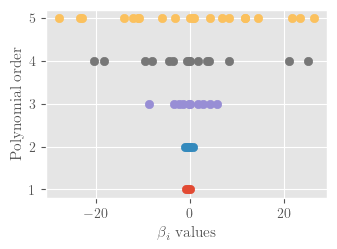

In [69]:
plot_betas_OLS_for_polydeg(N, 5, savefile='../figures/ols_betas.pdf')

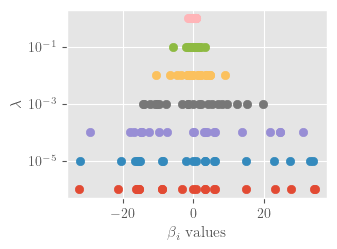

In [70]:
plot_betas_for_lmb(RidgeRegression, N, 5, lambdas, savefile='../figures/ridge_betas.pdf')

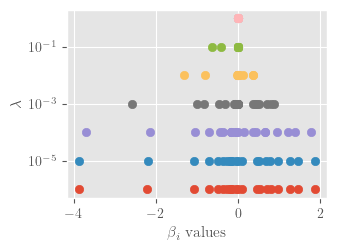

In [71]:
plot_betas_for_lmb(LassoRegression, N, 5, lambdas, savefile='../figures/lasso_betas.pdf')

## Bias variance tradeoff

In [72]:
N = 25
noise_eps = 0.01
degrees = np.arange(1, 16)
n_bootstraps = 100
n_samples = 200
n_points = np.arange(5, 50, 5)
n_splits = 10
max_order = 15
order = 10
lmb = 0.01

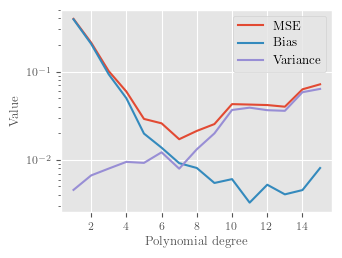

In [73]:
# bias variance tradeoff on different degrees
errors, biases, variances = bootstrap_OLS_degrees(N, n_bootstraps, n_samples, degrees, noise_eps=noise_eps)
plot_bias_variance_tradeoff_ols(degrees, errors, biases, variances, x_label='Polynomial degree', show=True, filename='../figures/bias_var_ols_deg.pdf')

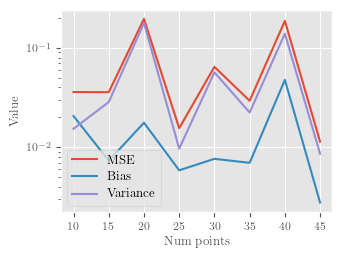

In [74]:
# bias variance tradeoff on different number of points
errors, biases, variances = bootstrap_OLS_npoints(n_points[1:], n_bootstraps, n_samples, order, noise_eps=noise_eps)
plot_bias_variance_tradeoff_ols(n_points[1:], errors, biases, variances, x_label='Num points', show=True, filename='../figures/bias_var_ols_npoints.pdf')

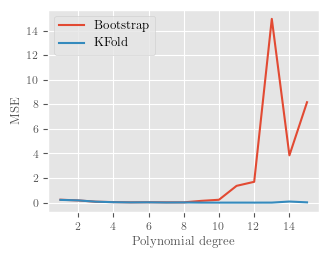

In [75]:
plot_MSE_boot_kfold(N, max_order, n_bootstraps, n_samples, n_splits, noise_eps, model_type='OLS', savefile='../figures/ols_boot_kfold_comp.pdf')


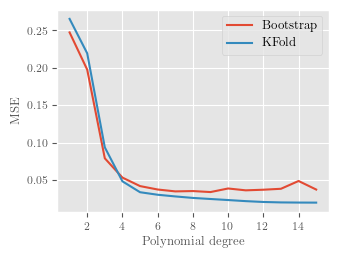

In [76]:
plot_MSE_boot_kfold(N, max_order, n_bootstraps, n_samples, n_splits, noise_eps, model_type='Ridge', lmb=lmb, savefile='../figures/ridge_boot_kfold_comp.pdf')

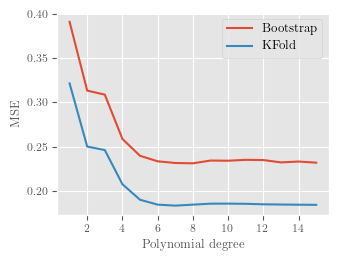

In [77]:
plot_MSE_boot_kfold(N, max_order, n_bootstraps, n_samples, n_splits, noise_eps, model_type='Lasso', lmb=lmb, savefile='../figures/lasso_boot_kfold_ocmp.pdf')

## Grid search and final plot of best parameters

Using Franke function data
Processing model degree: 1
Processing model degree: 2
Processing model degree: 3
Processing model degree: 4
Processing model degree: 5
Processing model degree: 6
Processing model degree: 7
Processing model degree: 8
Processing model degree: 9
Processing model degree: 10
Processing model degree: 11
Processing model degree: 12
Processing model degree: 13
Processing model degree: 14
Processing model degree: 15


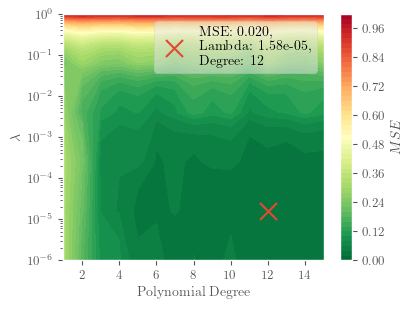

In [78]:
# hyperparameter tuning with ridge
polydeg_lmb_grid_seach(model_type='Lasso',
                        N=25,
                        down_sample=2,
                        noise_eps=0.01,
                        lmb_n=6,
                        lmb_min=-6,
                        lmb_max=0,
                        mindeg=1,
                        maxdeg=15,
                        k_folds=10,
                        terrain_data=False,
                        show=True,
                        save=True)

## Plot the surfaces from gridsearch

In [79]:
plt.rcParams['font.size'] = 10  # Slightly larger font size for overall text
plt.rcParams['axes.labelsize'] = 10  # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 9   # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 9   # Font size for y-axis tick labels

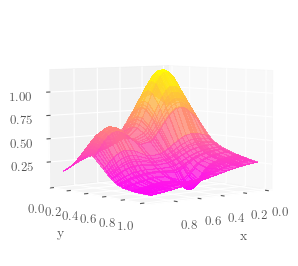

In [80]:
# plot franke surface
N = 50
noise_eps = 0
X, Y, Z, D = create_data(N, order=8, noise_eps=noise_eps)
# scale the data
scaler = StandardScaler()
# Z = scaler.fit_transform(Z)
# Z = scaler.inverse_transform(Z)
fig, ax = surfPlot(X, Y, Z, show=False)
ax.view_init(elev=5, azim=50)
ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('../figures/franke_surface.pdf', bbox_inches='tight')
plt.show()

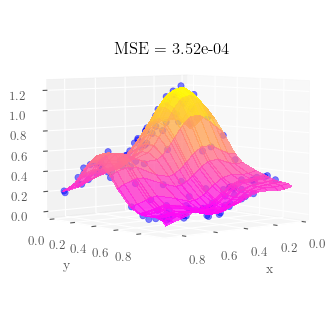

In [81]:
# Run ols on franke data and plot the surface 
N = 25
order = 8
noise_eps = 0.01

X, Y, Z, D = create_data(N, order, noise_eps)
# Z = scaler.fit_transform(Z)
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=False)
X_test, Y_test = D_test[:,1], D_test[:,2]

ols_beta, ols_pred_train, ols_pred_test = OLS(D_train, D_test, Z_train)
ridge_beta, ridge_pred_train, ridge_pred_test = RidgeRegression(D_train, D_test, Z_train, lmb=0.001)
lasso_beta, lasso_pred_train, lasso_pred_test = LassoRegression(D_train, D_test, Z_train, lmb=0.00001)

Z_pred = (D@ols_beta).reshape(X.shape)
# Z_pred = StandardScaler().fit(Z_train.reshape(-1,1)).inverse_transform(Z_pred)

mse_ols = mean_squared_error(Z_test, ols_pred_test)

fig, ax1 = scatterPlot(X_test, Y_test, Z_test, show=False)
surfPlot(X, Y, Z_pred, fig=fig, ax=ax1, show=False)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=5, azim=50)
ax1.set_facecolor((1.0, 1.0, 1.0, 0.0))
# ax1.set_title(f'MSE = {mse_ols}', pad=-500)
ax1.text2D(0.5, 0.85, f'MSE = {mse_ols:.2e}', transform=ax1.transAxes, ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/ols_franke_surface.pdf', bbox_inches='tight')
plt.show()


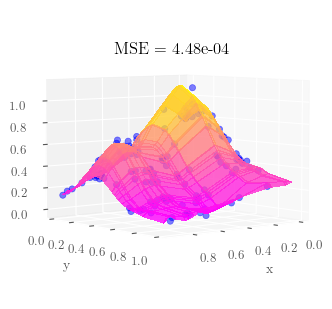

In [82]:
# Run ridge on franke data and plot the surface 
N = 25
order = 15
noise_eps = 0.01

X, Y, Z, D = create_data(N, order, noise_eps)
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=False)
X_test, Y_test = D_test[:,1], D_test[:,2]

ridge_beta, ridge_pred_train, ridge_pred_test = RidgeRegression(D_train, D_test, Z_train, lmb=1e-6)

Z_pred = (D @ ridge_beta).reshape(X.shape)

mse_ridge = mean_squared_error(Z_test, ridge_pred_test)


fig, ax1 = scatterPlot(X_test, Y_test, Z_test, show=False)
surfPlot(X, Y, Z_pred, fig=fig, ax=ax1, show=False)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=5, azim=50)
ax1.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax1.text2D(0.5, 0.85, f'MSE = {mse_ridge:.2e}', transform=ax1.transAxes, ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/ridge_franke_surface.pdf', bbox_inches='tight')
plt.show()


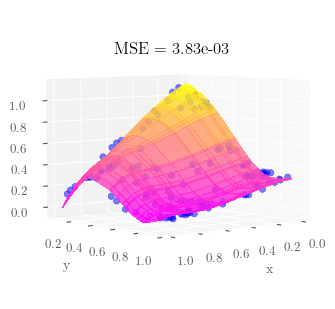

In [83]:
# Run lasso on franke data and plot the surface 
N = 25
order = 10
noise_eps = 0.01

X, Y, Z, D = create_data(N, order, noise_eps)
D_train, D_test, Z_train, Z_test = split_data(D, Z, test_size=0.2, scaled=False)
X_test, Y_test = D_test[:,1], D_test[:,2]

lasso_beta, lasso_pred_train, lasso_pred_test = LassoRegression(D_train, D_test, Z_train, lmb=1.58e-5)

Z_pred = (D @ lasso_beta).reshape(X.shape)
mse_lasso = mean_squared_error(Z_test, lasso_pred_test)

fig, ax1 = scatterPlot(X_test, Y_test, Z_test, show=False)
surfPlot(X, Y, Z_pred, fig=fig, ax=ax1, show=False)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=5, azim=50)
ax1.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax1.text2D(0.5, 0.85, f'MSE = {mse_lasso:.2e}', transform=ax1.transAxes, ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/lasso_franke_surface.pdf', bbox_inches='tight')
plt.show()